In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore')

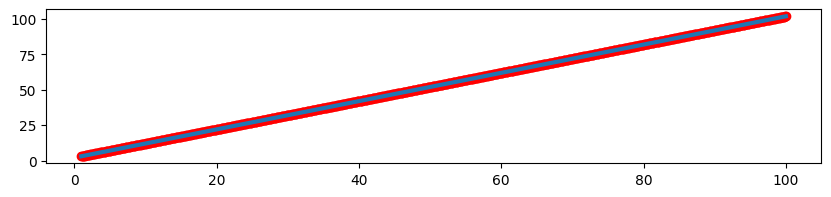

In [ ]:
#creating an data for linear regression
x = np.linspace(1,100,1000)
y = x+2
#converting data in dataframe
df = pd.DataFrame({"Number" :x, "Square":y})
df.head(3)
#Plot
plt.figure(figsize=(10,2))
plt.plot(x,y,linewidth=3)
plt.scatter(x,y,color='r')
plt.xticks()
plt.show()

In [ ]:
X=df[['Number']]
y=df['Square']

# proceeding without train test split and calculating prediction ana accuracy

In [ ]:
# proceeding without train test split and calculating prediction ana accuracy
Lr = LinearRegression()
Lr.fit(X,y)
#Prediction
y_pred = Lr.predict(X)
#Evalution
MSE = mean_squared_error(y_pred,y)
MAE = mean_absolute_error(y_pred,y)

print("MSE : ",MSE)
print("MAE : ",MAE)
print("Lr.score(X,y): ",Lr.score(X,y))
print('Lr.score(X,y_pred) : ',Lr.score(X,y_pred))

MSE :  3.9394885302786847e-28
MAE :  1.637978641610971e-14
Lr.score(X,y):  1.0
Lr.score(X,y_pred) :  1.0


Both Accuracy are equal

In [ ]:
error=y-y_pred

<Axes: xlabel='Square', ylabel='Density'>

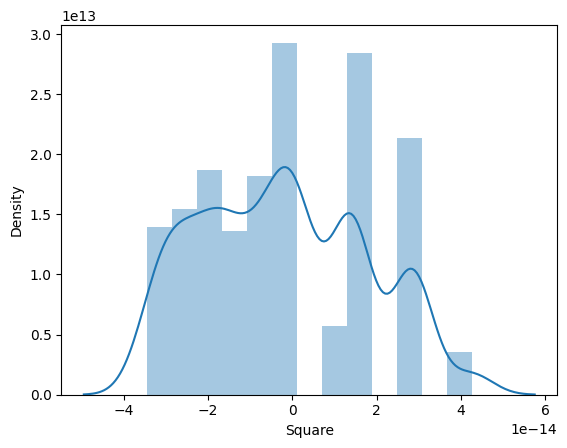

In [ ]:
sns.distplot(error,kde=True)

# # proceeding with train test split and calculating prediction ana accuracy

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
#modeling
Lr01 = LinearRegression()
Lr01.fit(X_train, y_train)
#PREDECTION
y_pred01 = Lr01.predict(X_test)
ytrain_pred = Lr01.predict(X_train)
#Evalution
MSE = mean_squared_error(y_pred01,y_test)
MAE = mean_absolute_error(y_pred01,y_test)

print("MSE : ",MSE)
print("MAE : ",MAE)
error = (y_pred01-y_test).mean()
print("error : ", error)
train_accuracy = Lr01.score(X_train,ytrain_pred)
test_accuracy = Lr01.score(X_test,y_pred01)
print("train_accuracy : ",train_accuracy)
print("test_accuracy : ",test_accuracy)

MSE :  0.0
MAE :  0.0
error :  0.0
train_accuracy :  1.0
test_accuracy :  1.0


# Model Selection
______
- train_accuracy == test_accuracy ---> Good Model
- train_accuracy <= test_accuracy ---> Underfitting
- train_accuracy >= test_accuracy ---> OverFitting
________
- Condition 01 : train_accuracy == test_accuracy
- Condition 02 : test_accuracy == cross validation score
- Condition 03 : test_accuracy ---> should satisfy business problem

- Condition 04 : Assumption ---> (only for Linear Regression)
              - Linearity Of Error
              - Normality of error
              - Standardization
_______________________



              

In [ ]:
#Condition 01
if(train_accuracy == test_accuracy) :
  print('Good Model')
elif(train_accuracy <= test_accuracy):
  print('Underfitting')
elif(train_accuracy >= test_accuracy):
  print('OverFitting')
#condition 02
cross_val_score(Lr01,X_train, ytrain_pred, cv=5).mean()
cross_val_score(Lr01,X_test, y_pred01, cv=5).mean()
print("train cross val score : ",cross_val_score(Lr01,X_train, ytrain_pred, cv=5).mean())
print("test cross val score : ",cross_val_score(Lr01,X_test, y_pred01, cv=5).mean())

Good Model
train cross val score :  1.0
test cross val score :  1.0


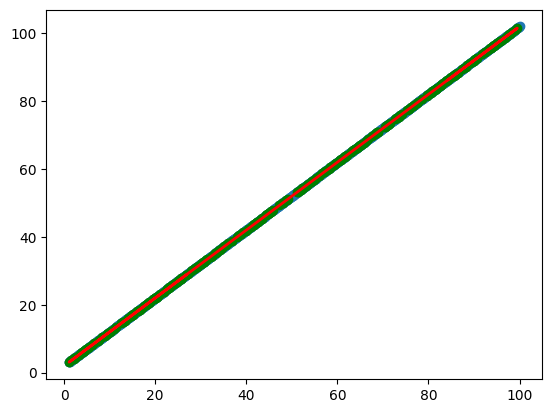

In [ ]:
plt.scatter(X,y)
plt.scatter(X_test,y_pred01,color='g')
plt.plot(X_test,y_pred01, linewidth=2, color='r')

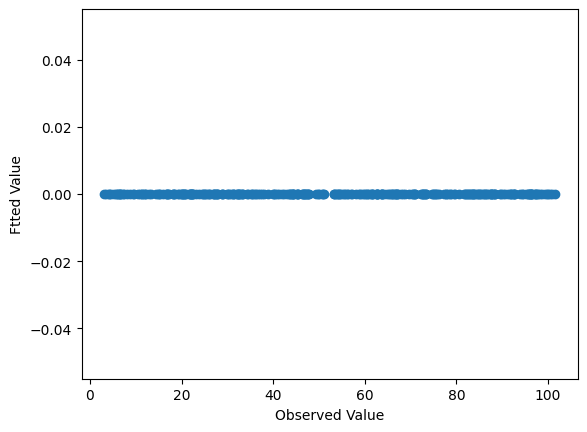

In [ ]:
error01=y_test-y_pred01
plt.scatter(y_test,error01)
plt.xlabel("Observed Value")
plt.ylabel("Ftted Value")
plt.show()

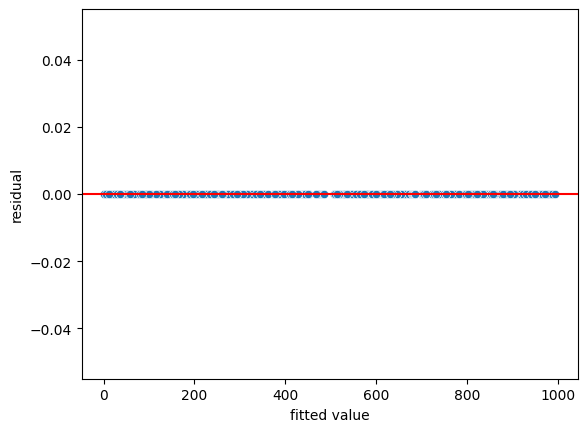

In [ ]:
sns.scatterplot(error01)
plt.axhline(y=0,color='r')
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.show()

In [ ]:
error01.skew()

0

<Axes: xlabel='Square', ylabel='Density'>

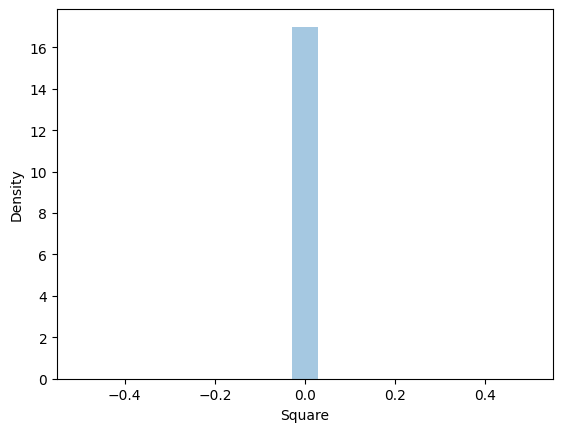

In [ ]:
sns.distplot(error01,kde=True)

Calculatin Error
macking change in dataset

In [ ]:
X['Number'][3]=10
X['Number'][6]=102
X['Number'][12]=102
X['Number'][20]=10
X['Number'][55]=105
X['Number'][76]=10
X

,Number
0,1.000000
1,1.099099
2,1.198198
3,10.000000
4,1.396396
...,...
995,99.603604
996,99.702703
997,99.801802
998,99.900901


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=7)
#modeling
Lr02 = LinearRegression()
Lr02.fit(X_train, y_train)
#PREDECTION
y_pred02 = Lr02.predict(X_test)
ytrain_pred02 = Lr02.predict(X_train)
#Evalution
MSE = mean_squared_error(y_pred02,y_test)
MAE = mean_absolute_error(y_pred02,y_test)

print("MSE : ",MSE)
print("MAE : ",MAE)
error = (y_pred01-y_test).mean()
print("error : ", error)
train_accuracy = Lr01.score(X_train,ytrain_pred02)
test_accuracy = Lr01.score(X_test,y_pred02)
print("train_accuracy : ",train_accuracy)
print("test_accuracy : ",test_accuracy)

MSE :  1.0864088432346333
MAE :  0.817691292680417
error :  -2.0913213213213218
train_accuracy :  0.9989624515463157
test_accuracy :  0.998861719040452


In [ ]:
#Condition 01
if(train_accuracy == test_accuracy) :
  print('Good Model')
elif(train_accuracy <= test_accuracy):
  print('Underfitting')
elif(train_accuracy >= test_accuracy):
  print('OverFitting')
#condition 02
cross_val_score(Lr02,X_train, ytrain_pred02, cv=5).mean()
cross_val_score(Lr02,X_test, y_pred02, cv=5).mean()
print("train cross val score : ",cross_val_score(Lr01,X_train, ytrain_pred02, cv=5).mean())
print("test cross val score : ",cross_val_score(Lr01,X_test, y_pred02, cv=5).mean())

OverFitting
train cross val score :  1.0
test cross val score :  1.0


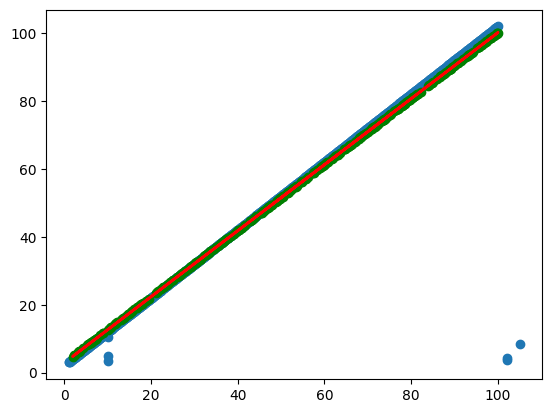

In [ ]:
plt.scatter(X,y)
plt.scatter(X_test,y_pred02,color='g')
plt.plot(X_test,y_pred02, linewidth=2, color='r')

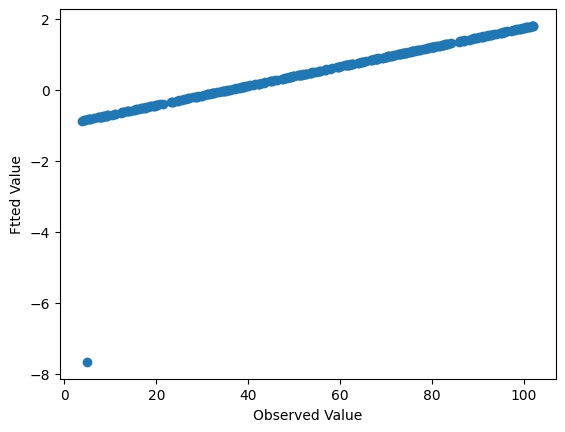

In [ ]:
error02=y_test-y_pred02
plt.scatter(y_test,error02)
plt.xlabel("Observed Value")
plt.ylabel("Ftted Value")
plt.show()

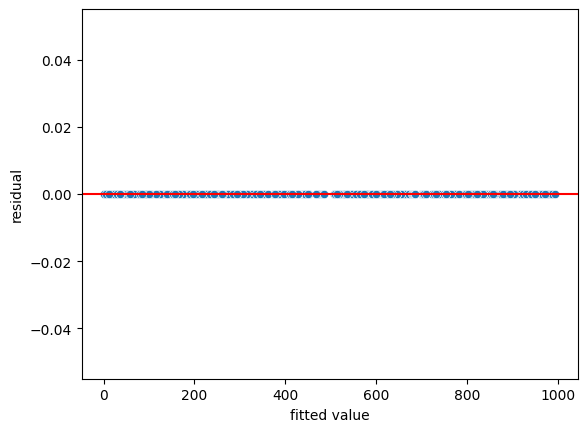

In [ ]:
sns.scatterplot(error01)
plt.axhline(y=0,color='r')
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.show()

In [ ]:
 #normality of error

<Axes: xlabel='Square', ylabel='Count'>

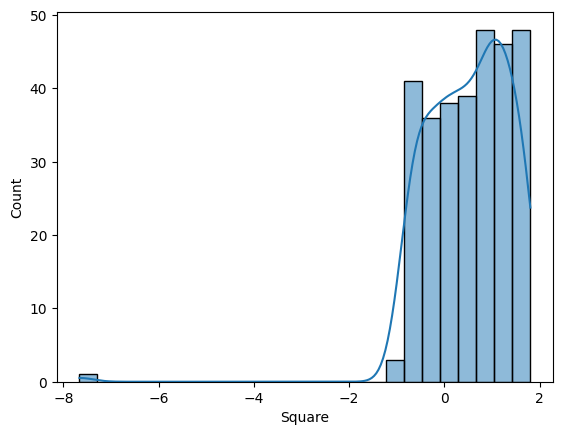

In [63]:
sns.histplot(error02,kde=True)

In [ ]:
#Equal variance of error

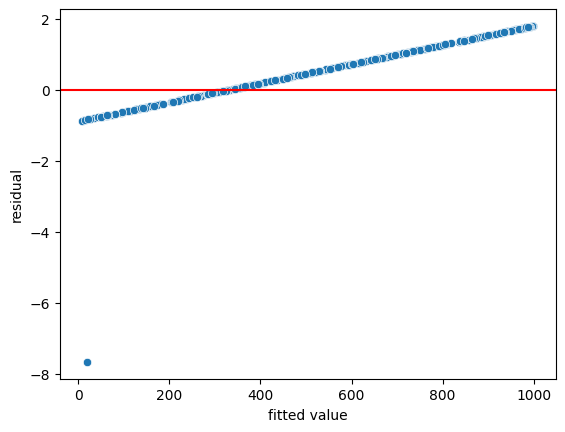

In [ ]:
sns.scatterplot(error02)
plt.axhline(y=0,color='r')
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.show()

In [ ]:
#Variable Significance

In [ ]:
import statsmodels.formula.api as smf

summary = smf.ols('y~X',data=df).fit()
summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.668e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:36:56   Log-Likelihood:                -3111.3
No. Observations:                1000   AIC:                             6227.
Df Residuals:                     998   BIC:                             6236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6084      0.351      7.441      0.000       1.920       3.296
X              0.9818      0.006    163.331      0.000       0.970       0.994
==============================================================================
Omnibus:                     2140.060   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4294463.728
Skew:                         -17.796   Prob(JB):                         0.00
Kurtosis:                     322.062   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""